In [ ]:
2! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jingwilliam","key":"e744f9cd0b0604ab5aeb941637300726"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

#! kaggle datasets download --unzip thedagger/pokemon-generation-one

! kaggle datasets download --unzip lantian773030/pokemonclassification
# rm dataset/dataset/ -rf

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import numpy as np
import time

torch.manual_seed(1) # set the random seed

# obtain data
from torchvision import datasets, transforms

import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)
vgg16 = torchvision.models.vgg16(pretrained=True)

 99% 411M/417M [00:06<00:00, 76.1MB/s]
100% 417M/417M [00:06<00:00, 63.6MB/s]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [ ]:
def get_model_name(path="/content/drive/My Drive/project/vgg", batch_size=64, learning_rate=0.01, epoch=30):
    path = "{}/poke7k_bs{}_lr{}_epoch{}".format(path,
            batch_size, learning_rate, epoch)
    return path

def get_data_loader(batch_size):
    """ Loads images of cats and dogs, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.Resize((224,224)), 
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load training data
    #train_path = 'PokemonData/'                                                                            #for CNN
    #datas = datasets.ImageFolder(train_path,transform)                                                     #CNN
    features_path = '/content/drive/My Drive/vgg16_features'                                                  #Alexnet
    datas = torchvision.datasets.DatasetFolder(features_path, loader=torch.load, extensions=('.tensor'))    #alexnet

    # Get the list of indices to sample from
    relevant_indices = []
    for i in range(len(datas)): relevant_indices.append(i)
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.9) #split at 90%
    split1 = int(len(relevant_indices) * 0.99) #split at 99%
    
    # split into training, validation and testing indices
    relevant_train_indices, relevant_val_indices, relevant_test_indices = relevant_indices[:split], relevant_indices[split:split1], relevant_indices[split1:]  
  
    
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(datas, batch_size=batch_size,
                                              num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(datas, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(datas, batch_size=batch_size,
                                              num_workers=1, sampler=test_sampler)

    return train_loader, val_loader, test_loader

In [ ]:
import torchvision.models
import os
alexnet = torchvision.models.alexnet(pretrained=True)
vgg16 = torchvision.models.vgg16(pretrained=True)

transform  = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_path = 'PokemonData/'
datas = datasets.ImageFolder(train_path,transform)

classes = []
for root, dirs, files in os.walk("PokemonData"):
    for dir in dirs:
        classes.append(dir)
classes.sort()

#alexnet_data = torch.utils.data.DataLoader(datas, batch_size=1, num_workers=1, shuffle=False)
#vgg16_data = torch.utils.data.DataLoader(datas, batch_size=1, num_workers=1, shuffle=False)
datas = torch.utils.data.DataLoader(datas, batch_size=1, num_workers=1, shuffle=False)

#features_path = '/content/drive/My Drive/p7k_features'
features_path = '/content/drive/My Drive/vgg16_features'


n=0

for img, label in datas:
    feature = vgg16.features(img)
    feature = torch.from_numpy(feature.detach().numpy())

    dir = features_path + '/' + str(classes[label])
    if not os.path.isdir(dir):
      os.mkdir(dir)

    torch.save(feature.squeeze(0), dir + '/' + str(n) + '.tensor')
    n += 1

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [ ]:
train_loader, val_loader, test_loader = get_data_loader(20)
for i, data in enumerate(train_loader, 0):
  imgs,labels = data
  print(i,imgs.shape,labels)
  if i==3: break

for i, data in enumerate(val_loader, 0):
  imgs,labels = data
  print(i,imgs.shape,labels)
  if i==3: break

for i, data in enumerate(test_loader, 0):
  imgs,labels = data
  print(i,imgs.shape,labels)
  if i==3: break  

In [ ]:
class AlexClassifier(nn.Module):
    def __init__(self):
        super(AlexClassifier, self).__init__()
        self.name = "AlexNet"
        self.fc1 = nn.Linear(256 * 6 * 6, 450)
        self.fc2 = nn.Linear(450, 150)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class VggClassifier(nn.Module):
    def __init__(self):
        super(VggClassifier, self).__init__()
        self.name = "Vgg16"
        self.fc1 = nn.Linear(7 * 7 * 512, 450)
        self.fc3 = nn.Linear(450, 150)

    def forward(self, x):
        x = x.view(-1, 7 * 7 * 512) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def get_accuracy(model, loader):

    correct = 0
    total = 0
    for imgs, labels in loader:
        
    #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
           imgs = imgs.cuda()
           labels = labels.cuda()
    #############################################

        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train(model, train_loader, val_loader, batch_size=64, num_epochs=1, learning_rate=0.01, save_data_path=""):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []
    bss, lrs, times = [], [], []

    # training
    n = 0 # the number of iterations
    start_epoch = 0 
    end_epoch = num_epochs

    if save_data_path != "":
      save_data = torch.load(save_data_path)
      start_epoch = save_data["epoch"]+1
      end_epoch = start_epoch + num_epochs
      iters = save_data["iters"]
      n = iters[-1]+1
      print("n = {}".format(n))
      losses = save_data["losses"]
      train_acc = save_data["train_acc"]
      val_acc = save_data["val_acc"]
      model.load_state_dict(save_data["state"])
      bss = save_data["bss"]
      lrs = save_data["lrs"]
      times = save_data["times"]

    start_time = last_time = time.time()    

    for epoch in range(start_epoch, end_epoch):
        for imgs, labels in iter(train_loader):
              
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy(model, val_loader))   # compute validation accuracy
            
            n += 1
        
        bss.append(batch_size)                            
        lrs.append(learning_rate)     
        times.append(time.time()-last_time)      
        last_time=time.time() 
        model_path = get_model_name(epoch=epoch+1,batch_size=batch_size,learning_rate=learning_rate)
        save_data = {"epoch":epoch,
                        "iters":iters,
                        "losses":losses,
                        "train_acc":train_acc,
                        "val_acc":val_acc,
                        "times":time.time()-start_time,
                        "state":model.state_dict(),
                        "bss":bss,
                        "lrs":lrs,
                        "times":times}
        torch.save(save_data, model_path)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f; Time %f;" % (epoch+1, loss, train_acc[-1], val_acc[-1], sum(times)))

    end_time = time.time()
    elapsed_time = end_time - start_time

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Total time elapsed: {:.2f} seconds".format(sum(times)))

In [ ]:
def get_saved_data_info(saved_data_path,item = "all"):
  if saved_data_path != "":
      save_data = torch.load(saved_data_path)
      if item != "all":
        print(item+" is "+save_data[item])
        return
      for item in save_data:
        if item != "state": print(item+"\n",save_data[item])

In [ ]:
#Alexnet
def featursDataLoaders(train_loader,val_loader,test_loader):
  !mkdir ./dataset/features
  !rm -rf ./dataset/features/*
  # i=0
  train_features, val_features, test_features = [],[],[]
  
  for i,data in enumerate(train_loader,0):
    imgs, labels = data
    torch.save((alexnet.features(imgs)).detach().numpy(),"./dataset/features/train_features_{}".format(i))
  
  for i,data in enumerate(val_loader,0):
    imgs, labels = data
    torch.save((alexnet.features(imgs)).detach().numpy(),"./dataset/features/val_features_{}".format(i))

  for i,data in enumerate(test_loader,0):
    imgs, labels = data
    torch.save((alexnet.features(imgs)).detach().numpy(),"./dataset/features/test_features_{}".format(i))


In [ ]:
def featursDataLoaders(train_loader,val_loader,test_loader):
  !mkdir ./dataset/features
  !rm -rf ./dataset/features/*
  # i=0
  train_features, val_features, test_features = [],[],[]
  
  for i,data in enumerate(train_loader,0):
    imgs, labels = data
    torch.save((vggnet.features(imgs)).detach().numpy(),"./dataset/features/train_features_{}".format(i))
  
  for i,data in enumerate(val_loader,0):
    imgs, labels = data
    torch.save((vggnet.features(imgs)).detach().numpy(),"./dataset/features/val_features_{}".format(i))

  for i,data in enumerate(test_loader,0):
    imgs, labels = data
    torch.save((vggnet.features(imgs)).detach().numpy(),"./dataset/features/test_features_{}".format(i))


In [ ]:
#read file from paused location
model_path = get_model_name(batch_size=512, learning_rate=0.005, epoch=16)
get_saved_data_info(model_path)

n = 426


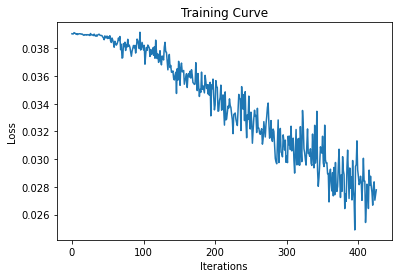

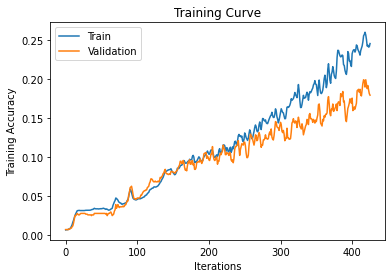

Final Training Accuracy: 0.2450872157209097
Final Validation Accuracy: 0.17917448405253283
Total time elapsed: 0.00 seconds


In [ ]:
model = PokemonClassifier()
train(model, train_loader, val_loader, batch_size=128, num_epochs=0, learning_rate=0.005, save_data_path=model_path)

In [ ]:
#Alexnet
use_cuda = True

model = AlexClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train_loader, val_loader, test_loader = get_data_loader(256)
train(model, train_loader, val_loader, batch_size=256, learning_rate = 0.005, num_epochs=30)

In [ ]:
#Alexnet start from pause
use_cuda = True

model = AlexClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
model_path = get_model_name(batch_size=512, epoch=23, learning_rate=0.005)
train_loader, val_loader, test_loader = get_data_loader(512)
train(model, train_loader, val_loader, batch_size=512, num_epochs=7, learning_rate=0.005, save_data_path=model_path)

In [ ]:
model = AlexClassifier()
train(model, train_loader, val_loader, batch_size=512, num_epochs=15, learning_rate=0.005, save_data_path=model_path)

CUDA is available!  Training on GPU ...
Epoch 1; Loss 4.809630; Train Acc 0.195503; Val Acc 0.112561; Time 92.883147;
Epoch 2; Loss 3.862107; Train Acc 0.519876; Val Acc 0.350734; Time 184.642635;
Epoch 3; Loss 2.734133; Train Acc 0.790160; Val Acc 0.582382; Time 275.598507;
Epoch 4; Loss 1.775542; Train Acc 0.891984; Val Acc 0.678630; Time 367.691848;
Epoch 5; Loss 1.197604; Train Acc 0.930433; Val Acc 0.732463; Time 459.218887;
Epoch 6; Loss 0.958794; Train Acc 0.954383; Val Acc 0.748777; Time 548.097147;
Epoch 7; Loss 0.585680; Train Acc 0.969697; Val Acc 0.763458; Time 636.588670;
Epoch 8; Loss 0.438741; Train Acc 0.979146; Val Acc 0.765090; Time 728.808830;
Epoch 9; Loss 0.396333; Train Acc 0.985663; Val Acc 0.781403; Time 816.597055;
Epoch 10; Loss 0.302245; Train Acc 0.989736; Val Acc 0.781403; Time 904.356159;
Epoch 11; Loss 0.226823; Train Acc 0.992669; Val Acc 0.786297; Time 995.225996;
Epoch 12; Loss 0.247090; Train Acc 0.995112; Val Acc 0.794454; Time 1083.645389;
Epoch 13;

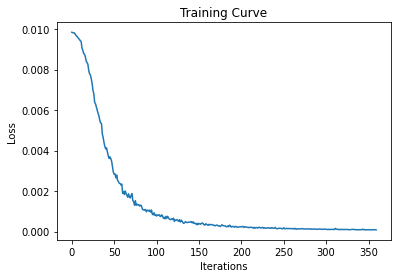

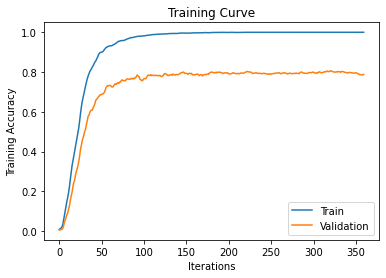

Final Training Accuracy: 0.9991854024112089
Final Validation Accuracy: 0.7879282218597063
Total time elapsed: 2782.47 seconds


In [ ]:
#Vgg16
use_cuda = True

model = VggClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train_loader, val_loader, test_loader = get_data_loader(512)
train(model, train_loader, val_loader, batch_size=512, learning_rate = 0.005, num_epochs=30)

CUDA is available!  Training on GPU ...
Epoch 1; Loss 4.259910; Train Acc 0.489247; Val Acc 0.311582; Time 190.775956;
Epoch 2; Loss 2.153081; Train Acc 0.831378; Val Acc 0.610114; Time 378.135591;
Epoch 3; Loss 1.010286; Train Acc 0.934018; Val Acc 0.709625; Time 559.816715;
Epoch 4; Loss 0.600029; Train Acc 0.971815; Val Acc 0.750408; Time 744.349365;
Epoch 5; Loss 0.334020; Train Acc 0.984360; Val Acc 0.755302; Time 923.302504;
Epoch 6; Loss 0.252310; Train Acc 0.993646; Val Acc 0.776509; Time 1101.740224;
Epoch 7; Loss 0.200015; Train Acc 0.996090; Val Acc 0.776509; Time 1280.497129;
Epoch 8; Loss 0.159339; Train Acc 0.997067; Val Acc 0.778140; Time 1464.523110;
Epoch 9; Loss 0.121675; Train Acc 0.998045; Val Acc 0.781403; Time 1657.059508;
Epoch 10; Loss 0.082639; Train Acc 0.998697; Val Acc 0.783034; Time 1847.909432;
Epoch 11; Loss 0.060000; Train Acc 0.999022; Val Acc 0.784666; Time 2042.004109;
Epoch 12; Loss 0.065745; Train Acc 0.998534; Val Acc 0.791191; Time 2237.379822;
Ep

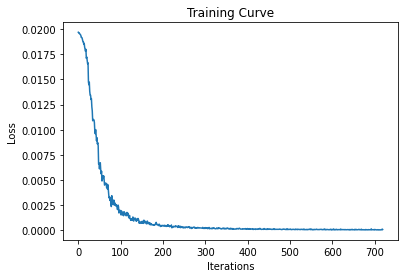

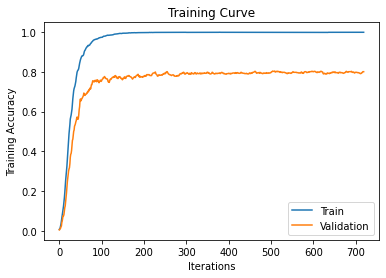

Final Training Accuracy: 0.9991854024112089
Final Validation Accuracy: 0.800978792822186
Total time elapsed: 5544.72 seconds


In [ ]:
#Vgg16 bs=256
use_cuda = True

model = VggClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train_loader, val_loader, test_loader = get_data_loader(256)
train(model, train_loader, val_loader, batch_size=256, learning_rate = 0.005, num_epochs=30)

In [ ]:
#Alexnet start from pause
use_cuda = True

model = AlexClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
model_path = get_model_name(batch_size=512, epoch=16, learning_rate=0.005)
train_loader, val_loader, test_loader = get_data_loader(512)
train(model, train_loader, val_loader, batch_size=512, num_epochs=14, learning_rate=0.005, save_data_path=model_path)